In [ ]:
pip install sklearn_features

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Common Libs
import numpy as np
import pandas as pd

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#prerpocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression


#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

#Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

#tuning
from sklearn.model_selection import cross_val_score

#ensemble
from sklearn.ensemble import RandomForestRegressor

#Metric
from sklearn.metrics import mean_squared_error

#ColumnTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#Explore the data
train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", train.shape)
print("\nColumns:", train.columns)
print("\nData types of columns:\n", train.dtypes)

Shape of the dataset: (43152, 11)

Columns: Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

Data types of columns:
 Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [ ]:
#Check for duplicated values
train.duplicated().sum()

0

In [ ]:
# Check for missing values
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#43152 rows × 11 columns
for i in train.columns :
    print(f"the number of unique values of \"{i}\" = {train[i].nunique()}")

the number of unique values of "Id" = 43152
the number of unique values of "carat" = 266
the number of unique values of "cut" = 5
the number of unique values of "color" = 7
the number of unique values of "clarity" = 8
the number of unique values of "depth" = 179
the number of unique values of "table" = 121
the number of unique values of "price" = 10640
the number of unique values of "x" = 546
the number of unique values of "y" = 543
the number of unique values of "z" = 368


In [ ]:
#split columns for two list >> numaric & categorical
numaric_columns = [c for c in train.columns if train[c].dtype!=object]
categorical_columns = [c for c in train.columns if train[c].dtype==object]

In [ ]:
print("numaric_columns >> ",numaric_columns)
print("categorical_columns >> ",categorical_columns)

numaric_columns >>  ['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_columns >>  ['cut', 'color', 'clarity']


In [ ]:
df=train
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


             Id     carat     depth     table     price         x         y  \
Id     1.000000  0.001141 -0.000776 -0.000739 -0.001111 -0.000519  0.001660   
carat  0.001141  1.000000  0.023944  0.182889  0.921911  0.975760  0.947060   
depth -0.000776  0.023944  1.000000 -0.302794 -0.013137 -0.029601 -0.033354   
table -0.000739  0.182889 -0.302794  1.000000  0.128501  0.197342  0.184310   
price -0.001111  0.921911 -0.013137  0.128501  1.000000  0.885181  0.861354   
x     -0.000519  0.975760 -0.029601  0.197342  0.885181  1.000000  0.968954   
y      0.001660  0.947060 -0.033354  0.184310  0.861354  0.968954  1.000000   
z     -0.000981  0.948923  0.090834  0.150746  0.857665  0.965677  0.942670   

              z  
Id    -0.000981  
carat  0.948923  
depth  0.090834  
table  0.150746  
price  0.857665  
x      0.965677  
y      0.942670  
z      1.000000  


<Axes: >

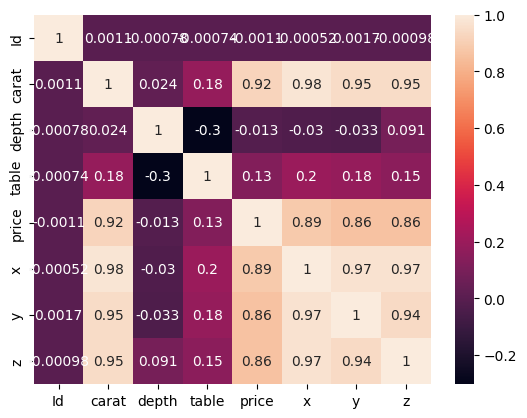

In [ ]:
numeric_df = df.select_dtypes(include=['number'])  # Choose only numeric columns
print(numeric_df.corr())
sns.heatmap(numeric_df.corr(), annot=True)

<Axes: xlabel='carat', ylabel='price'>

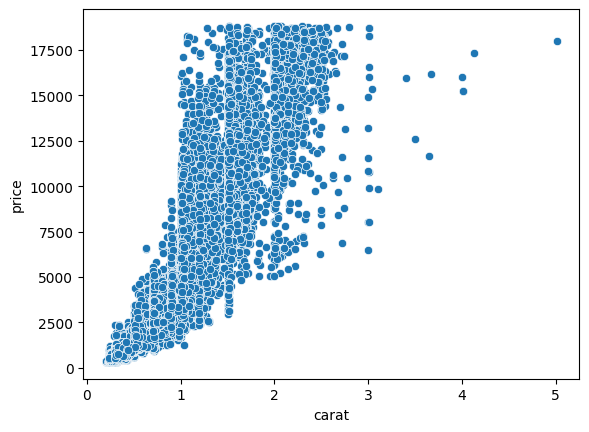

In [ ]:
sns.scatterplot(x=df["carat"], y = df["price"])

# As we know that the relation between carat and price goes exponentially that means carat is so important


In [ ]:
df[df["carat"] > 3].shape
#About 32 rows

(21, 11)

<Axes: xlabel='x', ylabel='price'>

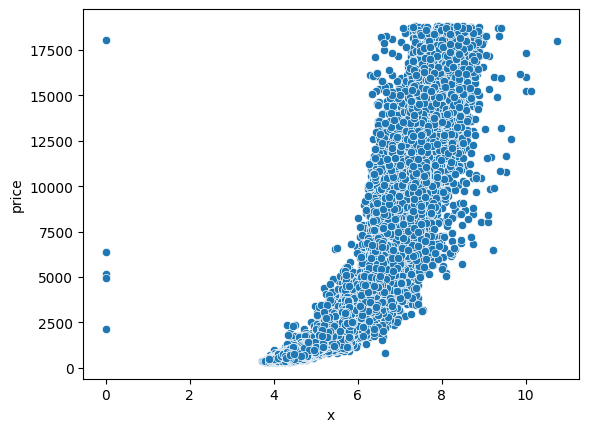

In [ ]:
sns.scatterplot(x=df["x"], y = df["price"])

# The relation between x and price seem to goes exponentially.

In [ ]:
df[df["x"] < 2 ].shape
#About 8 rows

(5, 11)

<Axes: xlabel='y', ylabel='price'>

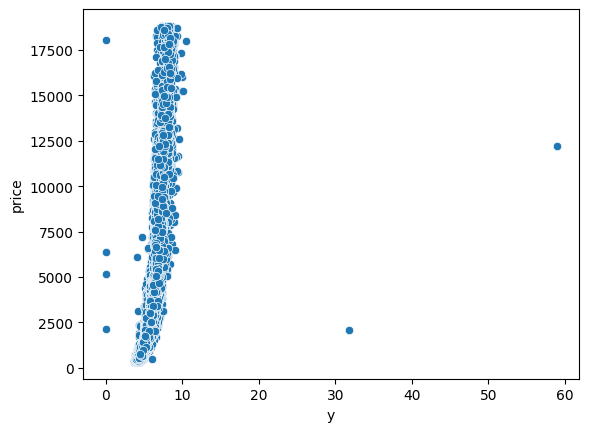

In [ ]:
sns.scatterplot(x=df["y"], y = df["price"])

# * We have outliers when y above 30 or y > 30.

In [ ]:
df[df["y"] > 30 ].shape
#Only two rows

(2, 11)

In [ ]:
df[df["y"] > 30 ]

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
35359,35360,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
40663,40664,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


<Axes: xlabel='z', ylabel='price'>

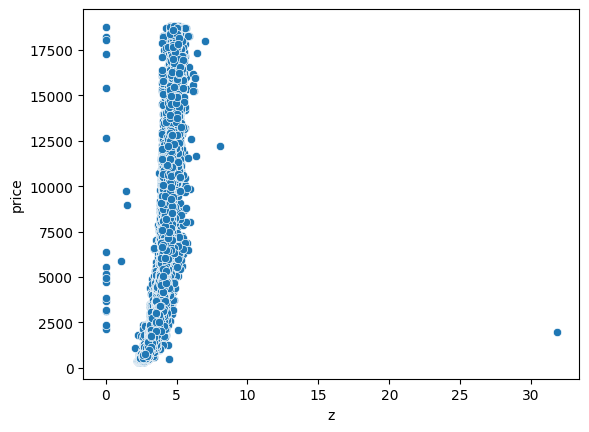

In [ ]:
sns.scatterplot(x=df["z"], y = df["price"])

# * We have outliers in z when it is above 30 or z > 30

In [ ]:
df[df["z"] > 30 ].shape
#There`s only one row

(1, 11)

<Axes: xlabel='depth', ylabel='price'>

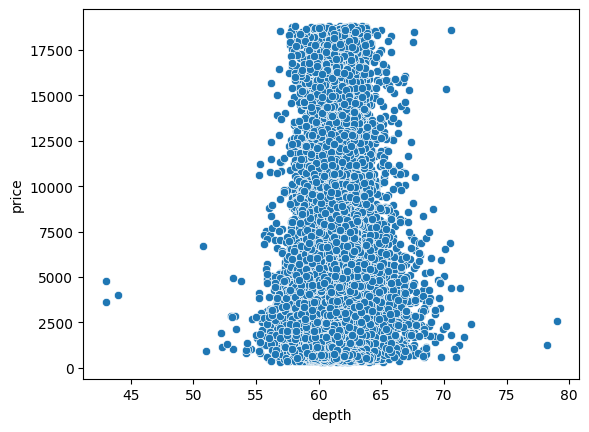

In [ ]:
sns.scatterplot(x= df["depth"] , y=df["price"])

# * May it`s an outliers in the relation between depth and price when depth is above 75 and less than 45

In [ ]:
df[(df["depth"] > 75) | (df["depth"] < 45 )].shape
#About 6 rows

(5, 11)

<Axes: xlabel='table', ylabel='price'>

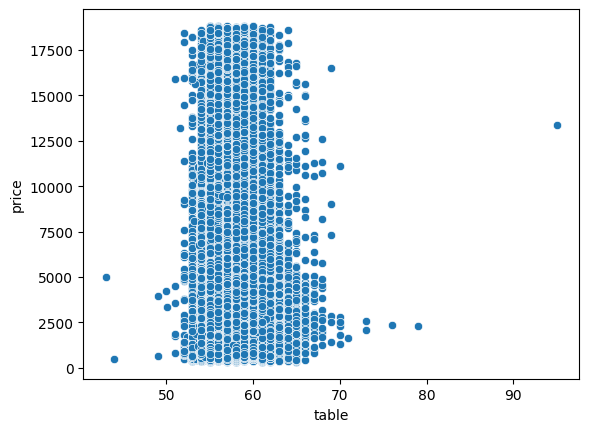

In [ ]:
sns.scatterplot(x= df["table"] , y=df["price"])

# Outliers between table and price when table is above 90.

In [ ]:
df[df["table"] > 90].shape
#Only one row

(1, 11)

# Coutplot on the three categorical data

In [ ]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

/var/folders/wh/n05swfjj2csglnm5v558llcr0000gn/T/ipykernel_4933/1787936073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="cut", palette='rocket')


<Axes: xlabel='cut', ylabel='count'>

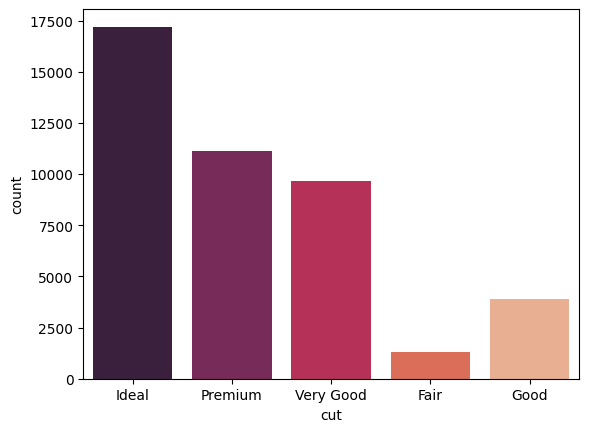

In [ ]:
sns.countplot(data=df, x="cut", palette='rocket')

/var/folders/wh/n05swfjj2csglnm5v558llcr0000gn/T/ipykernel_4933/2742270527.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="clarity", palette='rocket')


<Axes: xlabel='clarity', ylabel='count'>

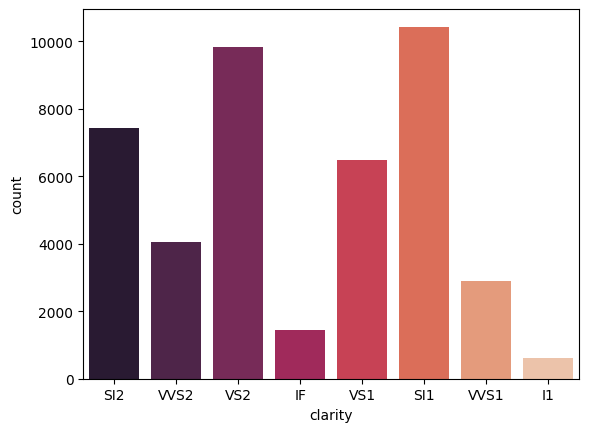

In [ ]:
sns.countplot(data=df, x="clarity", palette='rocket')

/var/folders/wh/n05swfjj2csglnm5v558llcr0000gn/T/ipykernel_4933/509845601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="color", palette='rocket')


<Axes: xlabel='color', ylabel='count'>

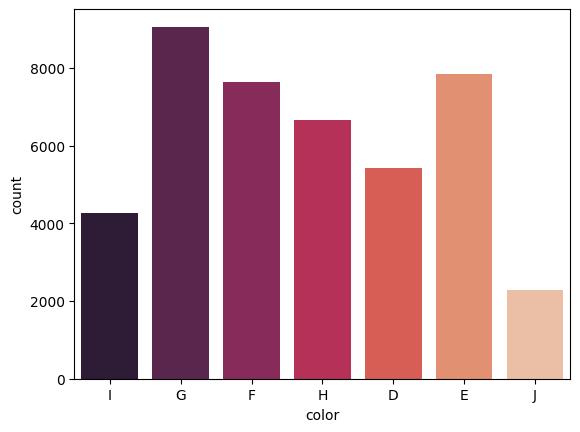

In [ ]:
sns.countplot(data=df, x="color", palette='rocket')

# Domain knowledge
The 4C`s.
**We go through these types of diamond charactirstics**

* Carat
* Cut
* Clarity
* Color
And we show the relationship between those

* 1- Carat and price.
* 2- Cut and price.
* 3- Clarity and price.
* 4- Color and price.
**Additionally we have dimension x, y, z related with price and it had strong correlation between them and the price

Finally relation between the 4C`s

4C`s: 1st one is Carat
To predict the price**

* We know that carat and price correlation is 0.921591.
* We see that the relation between carat and price is exponentioally not linear.
* and we see here there`s some outliers when the carat == 4 or above that.
* let`s see its indexes.
* **Carat Details**

carat noun 1. a measure of the quality of gold. Pure gold is 24 carats. A 22-carat gold ring 2. a measure of the weight of precious stones a 5-carat diamond (NOTE: Another US spelling is karat.)
Carat is refers to its weight not size and better weight is better than smaller.
Carat weight isn`s related to the sparkle, and the sparkle is a bright light, beautiful sparkle is related to the good cut
the relationship betwwn carat weight and price is depends on rarity or availability of a rough crystal.
carat is also a function of finding rough crystals with desirable color and external and internal characteristics that influenced clarity when diamond is cut.
Rough crystals: are rugged an untouched by humans and machine and hence, the most scared from gemstone

Size it is a term that basically refers to either length area or volume (i.e how big an objet is). Weight it is the force of gravity on your body

**Cut details**
* * cut is the most important, the better cut the more diamond sparkle.
* * Diamond has 4 great parts " Table, Crown, Gridle, Pavilion.
*  even though the diamond has perfect color and clarity a diamond with a poor cut will dulled brilliance.

In [ ]:
depth = df["z"] / ((df["x"] + df["y"])/2) * 100
pd.DataFrame(depth, columns=["Depth size in percent"]).head()

,Depth size in percent
0,61.807137
1,60.945946
2,61.312217
3,61.287224
4,60.975610


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


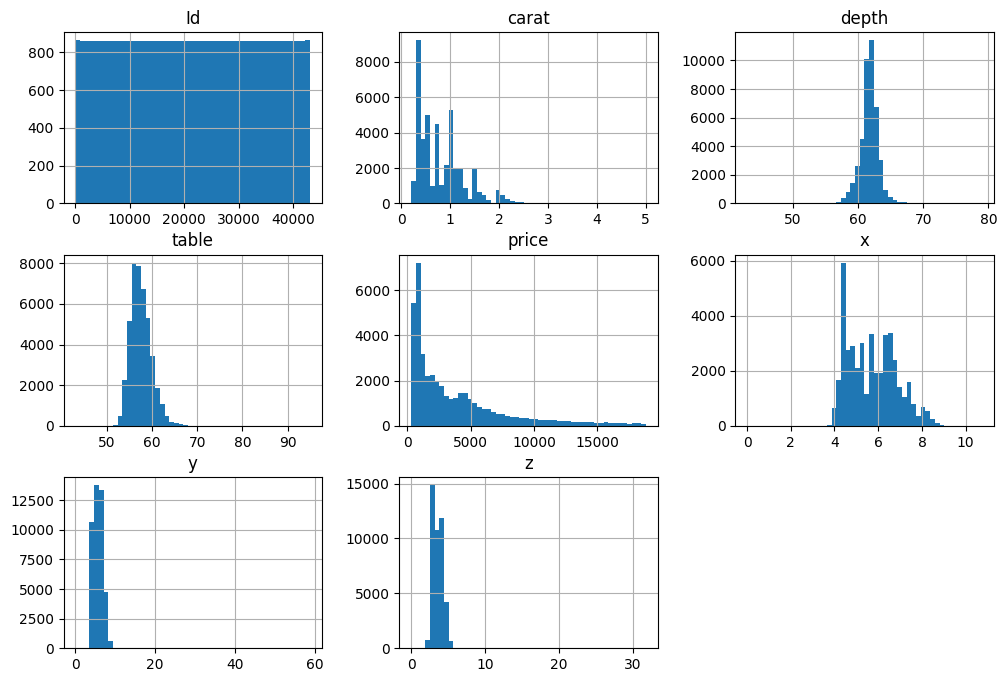

In [ ]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

## Prepare the Data for Machine Learning Algorithms

In [ ]:
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
train.corr(numeric_only=True)['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [ ]:
train_set, test_set = train_test_split(train, test_size=0.1, random_state=42)

In [ ]:
diamond = train_set.drop("price", axis=1)
diamond_labels = train_set["price"].copy()

# Converting Categorical Data (CCD)

In [ ]:
diamond['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [ ]:
diamond['color'].unique()

array(['E', 'G', 'H', 'J', 'F', 'D', 'I'], dtype=object)

In [ ]:
diamond['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AverageDimensionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['avg_dimension'] = X[['x', 'y', 'z']].mean(axis=1)
        return X

class VolumeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['volume'] = X['x'] * X['y'] * X['z']
        return X

class DepthMMTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['depth_mm'] = X['depth'] * X['avg_dimension'] / 2
        return X

class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X.drop(self.columns_to_drop, axis=1, inplace=True)
        return X

In [ ]:
# Define the order of categories for 'cut', 'color', and 'clarity'
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [ ]:
diamond

,Id,carat,cut,color,clarity,depth,table,x,y,z
30538,30539,0.41,Premium,E,SI2,60.0,59.0,4.82,4.78,2.88
26551,26552,0.40,Ideal,G,SI1,60.9,55.0,4.82,4.79,2.93
1640,1641,1.51,Very Good,G,VS1,62.9,58.0,7.32,7.41,4.63
25590,25591,0.43,Very Good,G,VS2,62.9,59.0,4.78,4.83,3.02
5688,5689,0.33,Ideal,G,IF,61.6,53.0,4.47,4.43,2.74
...,...,...,...,...,...,...,...,...,...,...
6265,6266,0.74,Very Good,G,SI1,63.5,60.0,5.73,5.68,3.62
11284,11285,1.04,Very Good,G,VS2,61.9,57.0,6.46,6.50,4.01
38158,38159,0.30,Premium,D,SI1,62.7,60.0,4.26,4.23,2.66
860,861,1.50,Ideal,I,SI1,59.4,60.0,7.54,7.50,4.47


In [ ]:
# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('avg_dimension', AverageDimensionTransformer()),
    ('volume', VolumeTransformer()),
    ('depth_mm', DepthMMTransformer()),
    ('drop_columns', DropColumnsTransformer(columns_to_drop=['x', 'y', 'z', 'depth','Id'])),
    ('scaler', StandardScaler())
])

numerical_features = [c for c in diamond.columns if diamond[c].dtype!=object]

# Combine numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, numerical_features),
    ('cut_encoder', OrdinalEncoder(categories=[cut_order]), ['cut']),
    ('color_encoder', OrdinalEncoder(categories=[color_order]), ['color']),
    ('clarity_encoder', OrdinalEncoder(categories=[clarity_order]), ['clarity'])
])

full_diamond_prepared = full_pipeline.fit_transform(diamond)

## check REMS

In [ ]:
import joblib

def train_and_save_regression_models(X, y, tag):
    # Initialize the models
    linear_reg = LinearRegression()
    decision_tree_reg = DecisionTreeRegressor(random_state=42)
    random_forest_reg = RandomForestRegressor(random_state=42)

    # Fit the models on the training data
    linear_reg.fit(X, y)
    decision_tree_reg.fit(X, y)
    random_forest_reg.fit(X, y)

    # Save the models
    # joblib.dump(linear_reg, f"lin_reg_{tag}_model.pkl")
    # joblib.dump(decision_tree_reg, f"tree_reg_{tag}_model.pkl")
    # joblib.dump(random_forest_reg, f"forest_reg_{tag}_model.pkl")

    models = {
        "Linear Regression": linear_reg,
        "Decision Tree": decision_tree_reg,
        "Random Forest": random_forest_reg
    }
    return models

def evaluate_regression_models(X, y, models):
    for model_name, model in models.items():
        # Make predictions on the training set
        preds = model.predict(X)

        # Calculate RMSE for each model
        rmse = np.sqrt(mean_squared_error(y, preds))

        # Print the RMSE for each model
        print(f"{model_name} RMSE: {rmse}")

def tain_and_evaluate_regression_models(X, y, tag):
    models = train_and_save_regression_models(X, y, "tag")
    evaluate_regression_models(X, y, models)
    return models

In [ ]:
full_models = tain_and_evaluate_regression_models(full_diamond_prepared, diamond_labels, 'full')

Linear Regression RMSE: 1204.6810358331998
Decision Tree RMSE: 32.15661942209833
Random Forest RMSE: 208.0903058166963


## cross-validation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X, y=diamond_labels, cv=10):
    # Perform cross-validation
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)

    # Calculate the RMSE scores
    rmse_scores = np.sqrt(-scores)

    # Print the RMSE scores for each fold
    print("RMSE scores for each fold:", rmse_scores)

    # Print the mean and standard deviation of the RMSE scores
    print("Mean RMSE:", rmse_scores.mean())
    print("Standard deviation of RMSE:", rmse_scores.std())

In [ ]:
for model_name, model in full_models.items():
  print(model_name, evaluate_model(model,X=full_diamond_prepared))

RMSE scores for each fold: [1126.73026979 1132.21216643 1259.9706732  1190.4800232  1185.73144539
 1299.61541757 1246.01466288 1205.91107645 1209.8613328  1194.17938102]
Mean RMSE: 1205.0706448719536
Standard deviation of RMSE: 50.797519169295256
Linear Regression None
RMSE scores for each fold: [709.40346918 746.47077336 760.78049761 731.12468535 679.20886846
 706.68156275 750.4699475  762.80595737 806.79241797 655.4654816 ]
Mean RMSE: 730.9203661145712
Standard deviation of RMSE: 42.07962061095255
Decision Tree None
RMSE scores for each fold: [518.14424887 565.56764266 548.60142783 573.98098973 537.19755655
 550.02168197 581.82153106 593.88155232 600.37373317 524.21597197]
Mean RMSE: 559.3806336133725
Standard deviation of RMSE: 26.94188927693233
Random Forest None


## check the best in test

In [ ]:
diamond_test = test_set.drop("price", axis=1)
diamond_test_labels = test_set["price"].copy()

diamond_test_prepared = full_pipeline.fit_transform(diamond_test)
evaluate_regression_models(diamond_test_prepared, diamond_test_labels, full_models)

Linear Regression RMSE: 1332.0389579199418
Decision Tree RMSE: 1002.2467961317197
Random Forest RMSE: 775.5077009614442


## Fine-Tune

In [ ]:
random_forest_reg = full_models['Random Forest']

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [50,100,150], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[5,15]}
]

grid_search = GridSearchCV(random_forest_reg, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(full_diamond_prepared, diamond_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 150]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 15]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
best_random_forest = grid_search.best_estimator_
best_random_forest_preds = best_random_forest.predict(full_diamond_prepared)
best_random_forest_rmse = np.sqrt(mean_squared_error(diamond_labels, best_random_forest_preds))
print("Best Random Forest RMSE:", best_random_forest_rmse)

Best Random Forest RMSE: 206.39053886388788


In [ ]:
best_random_forest

RandomForestRegressor(max_features=4, n_estimators=150, random_state=42)

## Save Test data

In [ ]:
# Apply the full_pipeline to preprocess the test data
test_prepared = full_pipeline.transform(test)

# Make predictions on the test data using the chosen regression model (e.g., linear_reg)
test_predictions = best_random_forest.predict(test_prepared)

# Create a submission file
submission = pd.DataFrame({'Id': test['Id'], 'price': test_predictions})
submission.to_csv('submission.csv', index=False)